# Tensorflow-Lite with MNIST

## Install Packages

In [ ]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sys import getsizeof

import tensorflow as tf
import h5py
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import plot_model, model_to_dot

Checking Tensorflow Version

In [ ]:
print(tf.__version__)

2.4.1


The version I used is 2.4.1

## Getting the File Size & Convert to Bytes

In [ ]:
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

In [ ]:
def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File Size: ' + str(round(size/1024, 3)) + 'Kilobytes')
    elif unit == 'MB':
        return print('File Size: ' + str(round(size/(1024*1024), 3)) + 'Megabytes')
    else:
        return print('File Size: ' + str(size) + 'bytes')

## Import the MNIST Dataset

This guide uses the **Fashion MNIST** dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

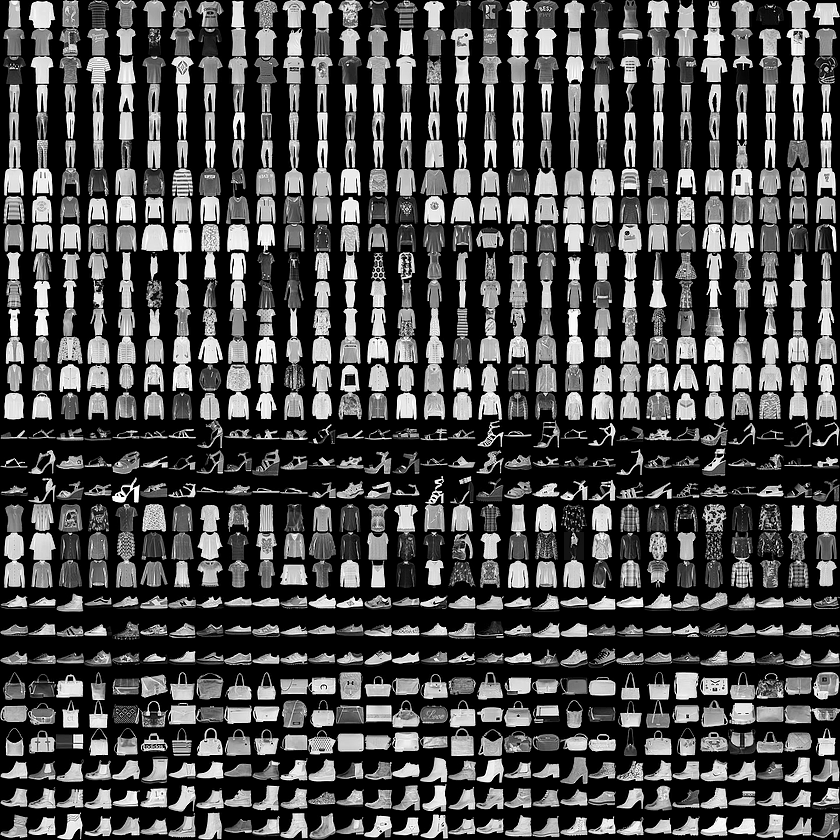

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_lables) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

## Explore the Data

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_images)

60000

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Test Dataset

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_images)

10000

## Preprocessing

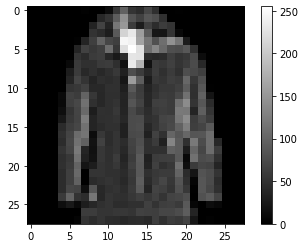

In [ ]:
plt.figure()
plt.imshow(train_images[19], cmap="gray")
plt.colorbar()
plt.grid(False)
plt.show()

## Normalising the images

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

## Build the Model

In [ ]:
model = keras.Sequential([
  Flatten(input_shape=(28,28)),
  Dense(128, activation='relu'),
  Dense(10)                 
])

## Compile the Model

In [ ]:
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

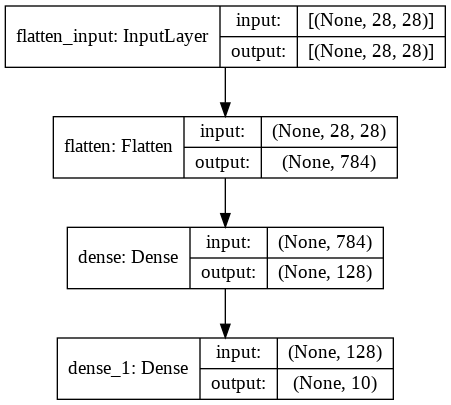

In [ ]:
plot_model(model,to_file='model.png',show_shapes=True,show_layer_names=True)
#SVG(model_to_dot(model).create(prog='dot',format='svg'))

## Summary of the Model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Training the Model

In [ ]:
h = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 1ms/step - loss: 0.6273 - accuracy: 0.7812
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3881 - accuracy: 0.8588
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3415 - accuracy: 0.8742
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3135 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2980 - accuracy: 0.8907
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2825 - accuracy: 0.8950
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2655 - accuracy: 0.9005
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2493 - accuracy: 0.9085
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2447 - accuracy: 0.9073
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.234

## Visualising the Accuracy and Loss

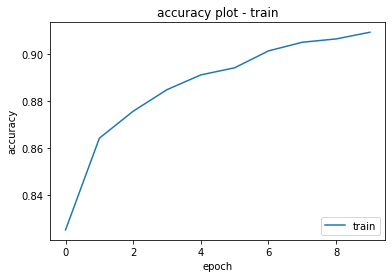

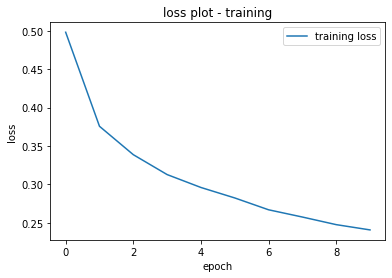

In [ ]:
plt.plot(h.history['accuracy'])
plt.legend(['train'], loc='lower right')
plt.title('accuracy plot - train')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

plt.plot(h.history['loss'])
plt.legend(['training loss'], loc = 'upper right')
plt.title('loss plot - training')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## Saving the Keras File

In [ ]:
KERAS_MODEL_NAME='tf_MODEL_FASHION_MNIST.h5'
model.save(KERAS_MODEL_NAME)

### Check the File Size

In [ ]:
convert_bytes(get_file_size(KERAS_MODEL_NAME), "MB")

File Size: 1.19Megabytes


## Evaluating our Model

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_lables, verbose=2)
print('Test Accuracy:', test_acc)
print('Test Loss:', test_loss)

313/313 - 0s - loss: 0.3289 - accuracy: 0.8855
Test Accuracy: 0.8855000138282776
Test Loss: 0.3289433717727661


## Saving the Tf Lite Model

In [ ]:
TF_LITE_MODEL_FILE_NAME = 'tf_lite_model.tflite'

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpfoto1nc7/assets


In [ ]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

408544

### Check the File Size

In [ ]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

File Size: 398.969Kilobytes


## Check Input Tensor Shape

In [ ]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [ 1 28 28]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 10]
Output Type: <class 'numpy.float32'>


## Resize Tensor Shape

In [ ]:
interpreter.resize_tensor_input(input_details[0]['index'], (10000, 28, 28))
interpreter.resize_tensor_input(output_details[0]['index'], (10000, 10))
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [10000    28    28]
Input Type: <class 'numpy.float32'>
Output Shape: [10000    10]
Output Type: <class 'numpy.float32'>


In [ ]:
test_images.dtype

dtype('float64')

In [ ]:
test_imgs_numpy = np.array(test_images, dtype=np.float32)

In [ ]:
interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
interpreter.invoke()

tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])

print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

Prediction results shape: (10000, 10)


## Testing the TF Lite model

In [ ]:
acc = accuracy_score(prediction_classes, test_lables)

In [ ]:
print('Test accuracy TFLITE model :', acc)

Test accuracy TFLITE model : 0.8855


## Post-Training Quantization of the TF Lite Model

In [ ]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_quant_model.tflite"

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tf_lite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE] #Optimise for Space
# tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tf_lite_converter.target_spec.supported_types = [tf.float16] #Quantised to float16
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmpkiak3pnv/assets


INFO:tensorflow:Assets written to: /tmp/tmpkiak3pnv/assets


In [ ]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

103856

In [ ]:
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

File Size: 101.422Kilobytes


## Check Input Tensor Shape

In [ ]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [ 1 28 28]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 10]
Output Type: <class 'numpy.float32'>


## Resize Tensor Shape

In [ ]:
interpreter.resize_tensor_input(input_details[0]['index'], (10000, 28, 28))
interpreter.resize_tensor_input(output_details[0]['index'], (10000, 10))
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [10000    28    28]
Input Type: <class 'numpy.float32'>
Output Shape: [10000    10]
Output Type: <class 'numpy.float32'>


In [ ]:
test_images.dtype

dtype('float64')

In [ ]:
test_imgs_numpy = np.array(test_images, dtype=np.float32)

In [ ]:
interpreter.set_tensor(input_details[0]['index'], test_imgs_numpy)
interpreter.invoke()
tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
print("Prediction results shape:", tflite_model_predictions.shape)
prediction_classes = np.argmax(tflite_model_predictions, axis=1)

Prediction results shape: (10000, 10)


In [ ]:
acc = accuracy_score(prediction_classes, test_lables)

In [ ]:
print('Test accuracy TFLITE model :', acc)

Test accuracy TFLITE model : 0.8834


### By Sayan Nath

### Get Weights of Keras Model

In [ ]:
print(model.get_weights()[0][0][0], type(model.get_weights()[0][0][0]))

-0.035257317 <class 'numpy.float32'>


In [ ]:
keras_weight_var = np.array([model.get_weights()[0][0][0]], dtype="float64")

In [ ]:
getsizeof(keras_weight_var[0])

32

### Access Quantized Weights of TF Lite

In [ ]:
TF_LITE_WEIGHTS_TEMP_FILE = "temp_weights_from_tflite.h5"

In [ ]:
interpreter = tf.lite.Interpreter(model_path=TF_LITE_MODEL_FILE_NAME)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
all_layers_details = interpreter.get_tensor_details() 
f = h5py.File(TF_LITE_WEIGHTS_TEMP_FILE, "w")   
for layer in all_layers_details:
     grp = f.create_group(str(layer['index']))
     grp.attrs["name"] = layer['name']
     grp.attrs["shape"] = layer['shape']
     grp.attrs["quantization"] = layer['quantization']
     grp.create_dataset("weights", data=interpreter.get_tensor(layer['index']))
f.close()

In [ ]:
temp_file = h5py.File(TF_LITE_WEIGHTS_TEMP_FILE, 'r')
print(temp_file["5"]["weights"][0][6], type(temp_file["5"]["weights"][0][6]))

-8 <class 'numpy.int8'>


In [ ]:
quantized_weight_var = np.array([temp_file["5"]["weights"][0][6]])

In [ ]:
getsizeof(quantized_weight_var[0])

25

In [ ]:
temp_file.close()